## Survey Data Analysis

**Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Importing the data

In [3]:
clicks = pd.read_csv('BA_Test_Dataset_v0.csv')
data = clicks.copy()
data.head()

,panelistid,dateoflastparticipation,lastlogindate,Invites,clicks,Completes
0,20969,12-11-2020 22:27,12-11-2020 11:28,85,78,35
1,61636,10-11-2020 18:02,10-11-2020 18:02,56,51,32
2,11987,12-11-2020 17:09,08-11-2020 11:37,93,71,30
3,61668,03-11-2020 16:27,03-11-2020 16:26,55,50,28
4,52634,12-11-2020 15:49,12-11-2020 15:49,82,74,28


## Data Description

1.       PanelistID :              
It is used to identify each user , which is unique to system.
2.       Dateoflastparticipation:          
Whenever panellist/user took the survey or login to portal, or done any kind of activity in our portal, this field will get updated. It will have the date on which the last action is performed by the user.
3.       Lastlogindate:                    
When panellist/ User logged in to portal will update this filed
4.       Invites:                    
Number of Surveys’ sent  to panellist/ user
5.       Clicks :                   
Number of Surveys’ clicked by the panellist/user as per invites sent
6.       Completes:           
Number of surveys’ completed by the panellist/ user as per invites sent 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22897 entries, 0 to 22896
Data columns (total 6 columns):
panelistid                 22897 non-null int64
dateoflastparticipation    22466 non-null object
lastlogindate              7977 non-null object
Invites                    22897 non-null int64
clicks                     22897 non-null int64
Completes                  22897 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.0+ MB


converting **dateoflastparticipation** and **lastlogindate** into datetime

In [5]:
data['dateoflastparticipation'] = pd.to_datetime(data['dateoflastparticipation'])
data['lastlogindate'] = pd.to_datetime(data['lastlogindate'])

creating date_diff column as the difference between dateoflastparticipation & lastlogindate in terms of days

In [29]:
data['date_diff'] = (data['dateoflastparticipation'] - data['lastlogindate']).dt.days

In [38]:
# Defining the target

def f(r):
    if (r.date_diff < 365) & (r.clicks >0):
        return 1
    else:
        return 0
    
data['hit'] = data.apply(f,axis=1)

In [44]:
data.head()

,panelistid,dateoflastparticipation,lastlogindate,Invites,clicks,Completes,date_diff,hit
0,20969,2020-12-11 22:27:00,2020-12-11 11:28:00,85,78,35,0.0,1
1,61636,2020-10-11 18:02:00,2020-10-11 18:02:00,56,51,32,0.0,1
2,11987,2020-12-11 17:09:00,2020-08-11 11:37:00,93,71,30,122.0,1
3,61668,2020-03-11 16:27:00,2020-03-11 16:26:00,55,50,28,0.0,1
4,52634,2020-12-11 15:49:00,2020-12-11 15:49:00,82,74,28,0.0,1


In [39]:
data.shape

(22897, 8)

In [40]:
#checking for duplicates
data[data.duplicated(keep=False)]

,panelistid,dateoflastparticipation,lastlogindate,Invites,clicks,Completes,date_diff,hit
621,60441,2020-10-30 16:01:00,2020-10-30 16:01:00,7,4,2,0.0,1
805,60441,2020-10-30 16:01:00,2020-10-30 16:01:00,7,4,2,0.0,1
952,55744,2020-09-15 21:38:00,2020-07-05 10:28:00,2,1,1,72.0,1
1868,55744,2020-09-15 21:38:00,2020-07-05 10:28:00,2,1,1,72.0,1
11178,24375,2020-07-05 13:05:00,2017-03-27 07:21:00,7,3,0,1196.0,0
12639,24375,2020-07-05 13:05:00,2017-03-27 07:21:00,7,3,0,1196.0,0
19858,56271,2018-04-16 17:27:00,2018-04-16 17:25:00,9,0,0,0.0,0
19859,56271,2018-04-16 17:27:00,2018-04-16 17:25:00,9,0,0,0.0,0


In [41]:
# Removing Duplicates
data = data.drop_duplicates(keep = 'first')
data.shape

(22893, 8)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22893 entries, 0 to 22896
Data columns (total 8 columns):
panelistid                 22893 non-null int64
dateoflastparticipation    22462 non-null datetime64[ns]
lastlogindate              7973 non-null datetime64[ns]
Invites                    22893 non-null int64
clicks                     22893 non-null int64
Completes                  22893 non-null int64
date_diff                  7680 non-null float64
hit                        22893 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 1.6 MB


In [43]:
data.describe()

,panelistid,Invites,clicks,Completes,date_diff,hit
count,22893.000000,22893.000000,22893.000000,22893.000000,7680.000000,22893.000000
mean,35447.605993,12.665269,0.747259,0.180142,174.247266,0.067051
std,28023.586779,11.767600,3.147126,0.955481,366.935709,0.250116
min,3380.000000,1.000000,0.000000,0.000000,-303.000000,0.000000
25%,21293.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,30622.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,40312.000000,15.000000,0.000000,0.000000,8.000000,0.000000
max,183200.000000,103.000000,78.000000,35.000000,1530.000000,1.000000


checking for null values

In [45]:
data.isna().sum()

panelistid                     0
dateoflastparticipation      431
lastlogindate              14920
Invites                        0
clicks                         0
Completes                      0
date_diff                  15213
hit                            0
dtype: int64

In [46]:
# dropping null values
data.dropna(inplace=True)

In [47]:
data.isna().sum()

panelistid                 0
dateoflastparticipation    0
lastlogindate              0
Invites                    0
clicks                     0
Completes                  0
date_diff                  0
hit                        0
dtype: int64

In [48]:
# resetting index
data = data.reset_index(drop = True)

In [49]:
data.shape

(7680, 8)

In [50]:
# we can drop panellistid
data.drop(columns = 'panelistid', inplace = True)

extracting year and month from dateoflastparticipation as it respresents some activity in the portal by the panellist

In [51]:
data['part_year'] = pd.DatetimeIndex(data['dateoflastparticipation']).year
data['part_month'] = pd.DatetimeIndex(data['dateoflastparticipation']).month

In [52]:
data.head()

,dateoflastparticipation,lastlogindate,Invites,clicks,Completes,date_diff,hit,part_year,part_month
0,2020-12-11 22:27:00,2020-12-11 11:28:00,85,78,35,0.0,1,2020,12
1,2020-10-11 18:02:00,2020-10-11 18:02:00,56,51,32,0.0,1,2020,10
2,2020-12-11 17:09:00,2020-08-11 11:37:00,93,71,30,122.0,1,2020,12
3,2020-03-11 16:27:00,2020-03-11 16:26:00,55,50,28,0.0,1,2020,3
4,2020-12-11 15:49:00,2020-12-11 15:49:00,82,74,28,0.0,1,2020,12


In [53]:
data.hit.value_counts()

0    6145
1    1535
Name: hit, dtype: int64

The data is **imbalanced** 

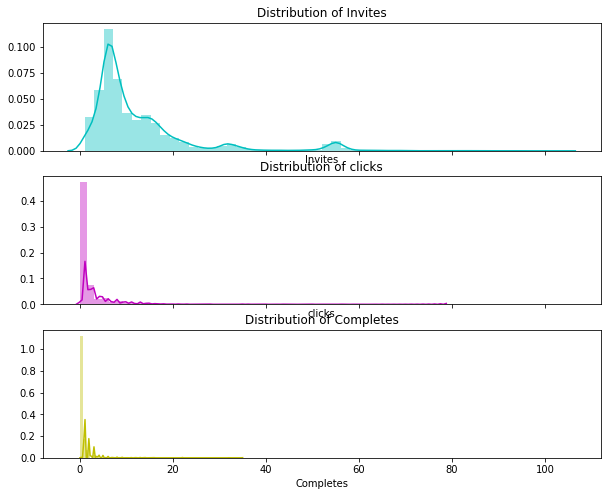

In [54]:
figure,ax = plt.subplots(3,1,sharex =True, figsize=(10,8))
sns.distplot(data['Invites'], color='c', ax=ax[0])
ax[0].set_title('Distribution of Invites')
sns.distplot(data['clicks'],color = 'm', ax=ax[1])
ax[1].set_title('Distribution of clicks')
sns.distplot(data['Completes'],color='y', ax=ax[2])
ax[2].set_title('Distribution of Completes')
plt.show()

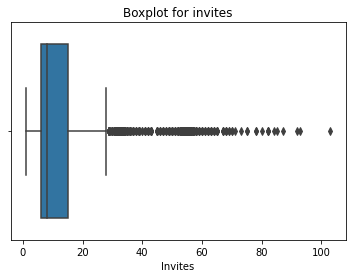

In [55]:
sns.boxplot(data['Invites'])
plt.title('Boxplot for invites')
plt.show()

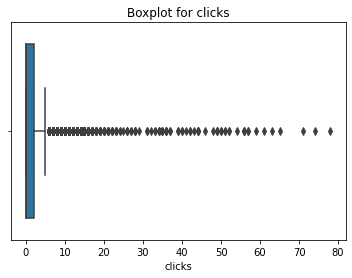

In [56]:
sns.boxplot(data['clicks'])
plt.title('Boxplot for clicks')
plt.show()

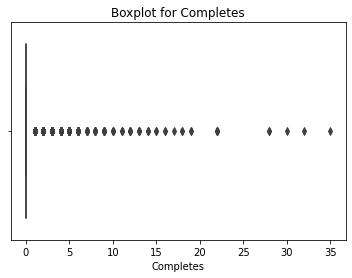

In [57]:
sns.boxplot(data['Completes'])
plt.title('Boxplot for Completes')
plt.show()

From the above three boxplots we can infer that there are outliers in Invites, Clicks, Completes, we will Standard scalar to these columns to reduce the scale

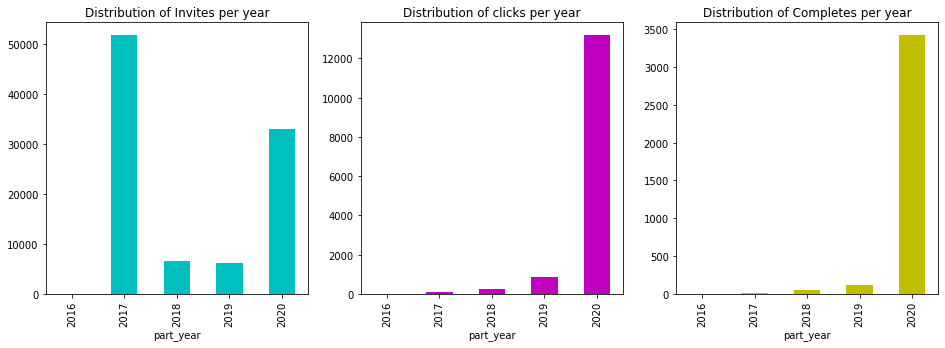

In [58]:
figure,ax = plt.subplots(1,3, figsize=(16,5))
data.groupby(data['part_year'])['Invites'].sum().plot(kind = 'bar', color='c', ax = ax[0])
ax[0].set_title('Distribution of Invites per year')
data.groupby(data['part_year'])['clicks'].sum().plot(kind = 'bar', color='m', ax=ax[1])
ax[1].set_title('Distribution of clicks per year')
data.groupby(data['part_year'])['Completes'].sum().plot(kind = 'bar', color='y', ax=ax[2])
ax[2].set_title('Distribution of Completes per year')
plt.show()

Even though more number of invites were sent in 2017, more number of clicks and completes happend in 2020

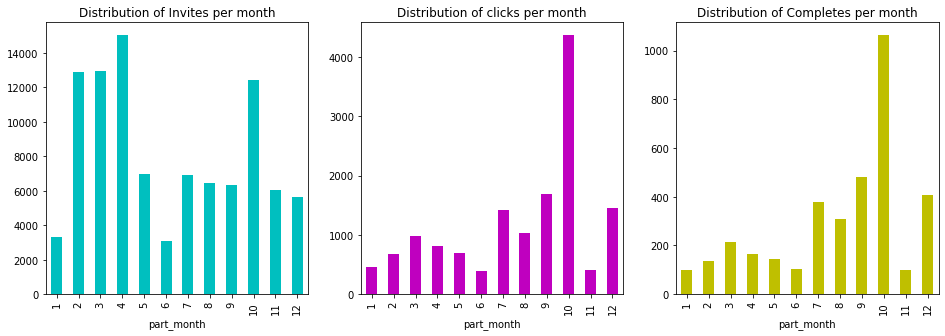

In [59]:
figure,ax = plt.subplots(1,3, figsize=(16,5))
data.groupby(data['part_month'])['Invites'].sum().plot(kind = 'bar', color='c', ax = ax[0])
ax[0].set_title('Distribution of Invites per month')
data.groupby(data['part_month'])['clicks'].sum().plot(kind = 'bar', color='m', ax=ax[1])
ax[1].set_title('Distribution of clicks per month')
data.groupby(data['part_month'])['Completes'].sum().plot(kind = 'bar', color='y', ax=ax[2])
ax[2].set_title('Distribution of Completes per month')
plt.show()

More number of clicks and completes are happenig in in the month of october, i.e, if invites are sent in thr month of october, probability that the survey gets completed is more

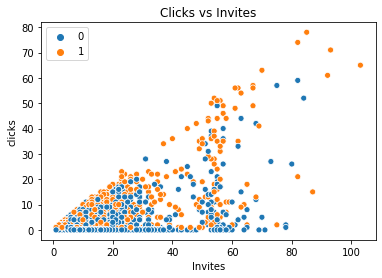

In [60]:
sns.scatterplot(data['Invites'], data['clicks'], hue= data.hit.to_list() )
plt.xlabel('Invites')
plt.ylabel('clicks')
plt.title('Clicks vs Invites');

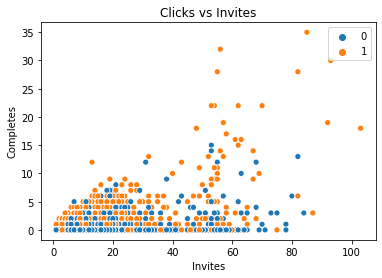

In [61]:
sns.scatterplot(data['Invites'], data['Completes'], hue= data.hit.to_list() )
plt.xlabel('Invites')
plt.ylabel('Completes')
plt.title('Clicks vs Invites');

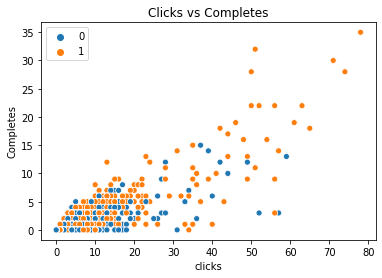

In [64]:
sns.scatterplot(data['clicks'], data['Completes'], hue= data.hit.to_list() )
plt.xlabel('clicks')
plt.ylabel('Completes')
plt.title('Clicks vs Completes');

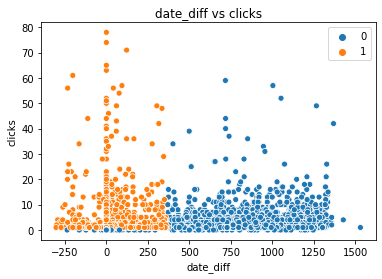

In [65]:
sns.scatterplot(data['date_diff'], data['clicks'], hue= data.hit.to_list() )
plt.xlabel('date_diff')
plt.ylabel('clicks')
plt.title('date_diff vs clicks');

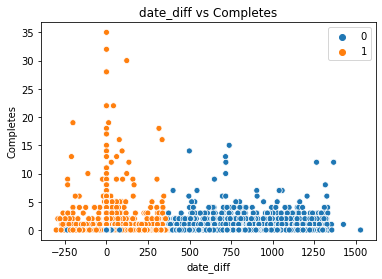

In [66]:
sns.scatterplot(data['date_diff'], data['Completes'], hue= data.hit.to_list() )
plt.xlabel('date_diff')
plt.ylabel('Completes')
plt.title('date_diff vs Completes');

As we see from above two scatter plots more number of inactive people are contributing to class 0 in the target

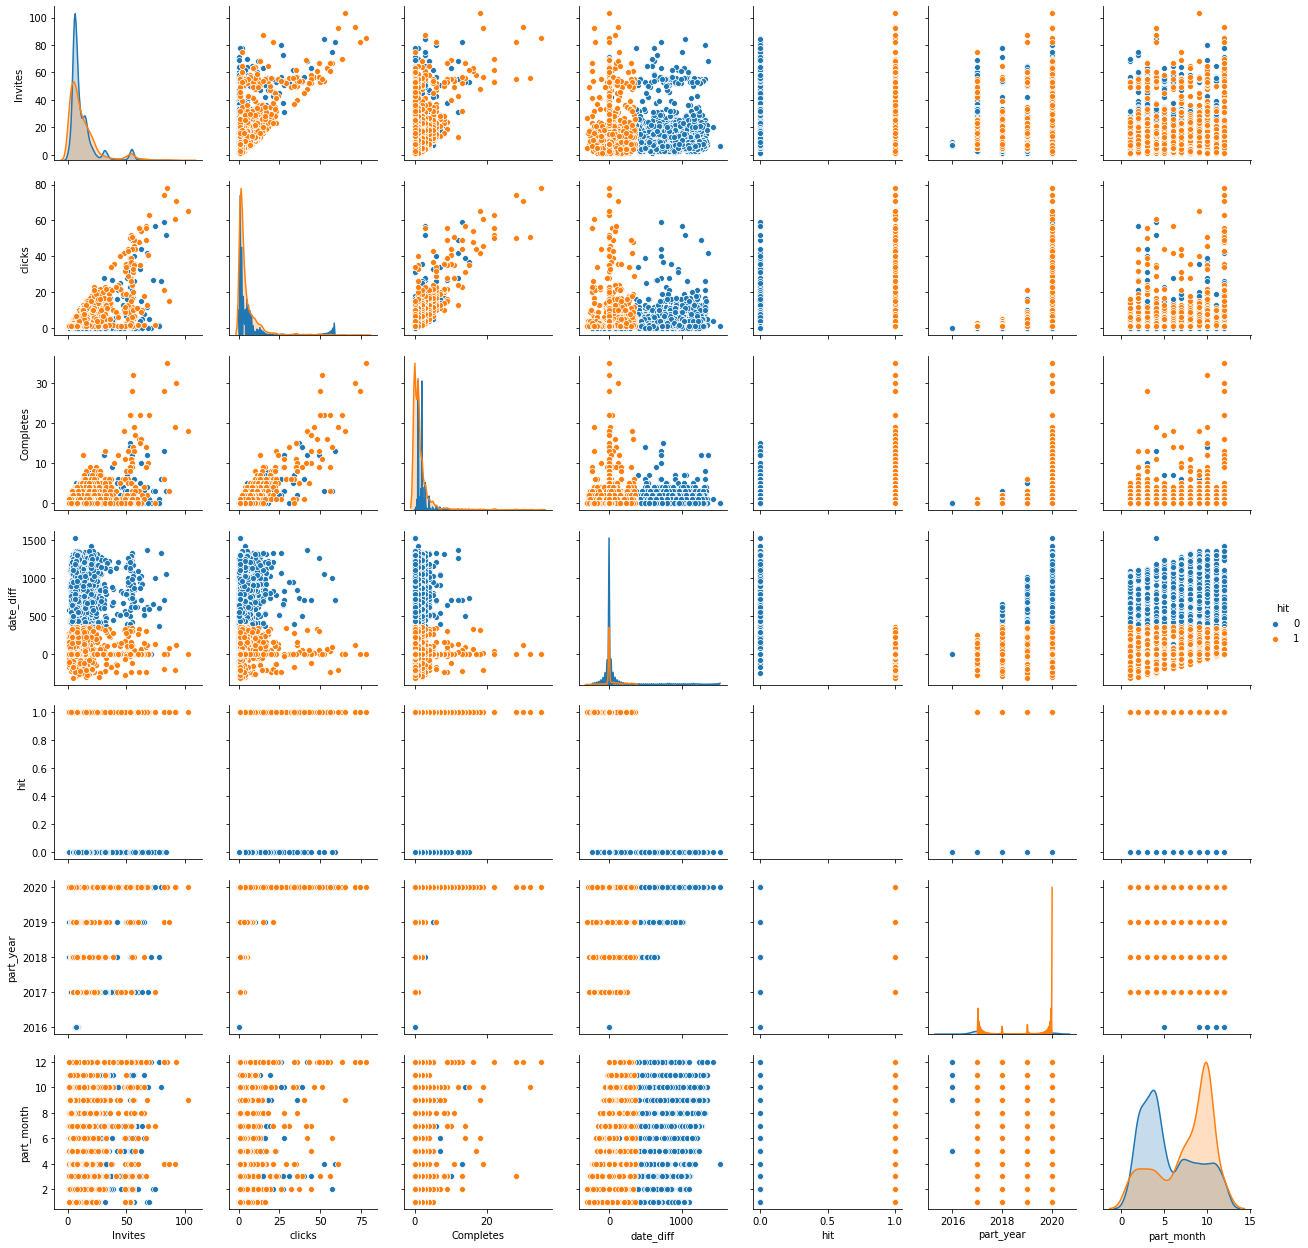

In [63]:
sns.pairplot(data, hue='hit');

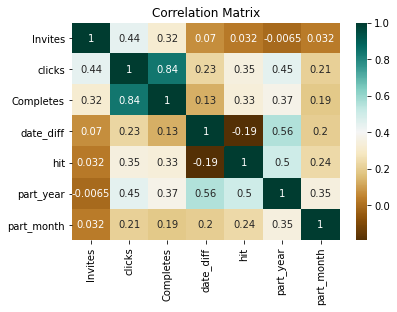

In [68]:
sns.heatmap(data.corr(), annot=True, cmap= 'BrBG')
plt.title('Correlation Matrix')
plt.show()

Clicks and Completes are in good correlation with each other, so we are going to remove clicks from the trainig dataset

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
ss = StandardScaler()
data['Invites'] = ss.fit_transform(data[['Invites']])
data['Completes'] = ss.fit_transform(data[['Completes']])
data['clicks'] = ss.fit_transform(data[['clicks']])
data['date_diff'] = ss.fit_transform(data[['date_diff']])

In [83]:
X = data[['Invites','Completes','date_diff','part_year','part_month']]
y = data[['hit']]

In [90]:
y['hit'].value_counts()

0    6145
1    1535
Name: hit, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

The data is imbalenced, to overcome this issue we use random over sampler

In [81]:
from imblearn.over_sampling import RandomOverSampler 

In [91]:
ros = RandomOverSampler(random_state=64)
X,y = ros.fit_sample(X,y)

In [103]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 6145, 0: 6145})


In [104]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=64)

#### Logistic Regression

In [107]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

y_pred = lr.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1229
           1       0.83      0.72      0.77      1229

    accuracy                           0.79      2458
   macro avg       0.79      0.79      0.78      2458
weighted avg       0.79      0.79      0.78      2458



**NaiveBayes**

In [108]:
nb =  GaussianNB()
nb.fit(trainX,trainY)

y_pred = nb.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1229
           1       0.94      0.78      0.85      1229

    accuracy                           0.86      2458
   macro avg       0.88      0.86      0.86      2458
weighted avg       0.88      0.86      0.86      2458



**DecisionTree**

In [109]:
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)

y_pred = dt.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1229
           1       0.97      0.98      0.97      1229

    accuracy                           0.97      2458
   macro avg       0.97      0.97      0.97      2458
weighted avg       0.97      0.97      0.97      2458



**SVM**

In [111]:
svm = SVC()
svm.fit(trainX, trainY)

y_pred = svm.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1229
           1       0.93      0.94      0.93      1229

    accuracy                           0.93      2458
   macro avg       0.93      0.93      0.93      2458
weighted avg       0.93      0.93      0.93      2458



**RandomForest**

In [110]:
rf = RandomForestClassifier()
rf.fit(trainX, trainY)

y_pred = rf.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1229
           1       0.97      0.98      0.97      1229

    accuracy                           0.97      2458
   macro avg       0.97      0.97      0.97      2458
weighted avg       0.97      0.97      0.97      2458



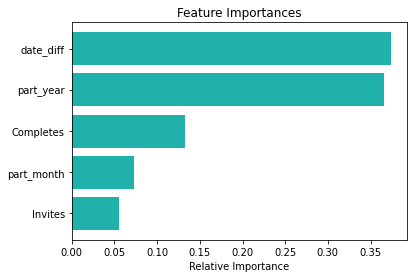

In [117]:
features=['Invites','Completes','date_diff','part_year','part_month']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='lightseagreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**BayesianOptimization**

In [119]:
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [121]:
def bayes_opt(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, trainX, trainY, scoring='accuracy').mean()
    return {'loss':-acc, 'status':STATUS_OK}


space = {
    'n_estimators':hp.choice('n_estimators',[100,200,300,350,400,500]),
    'max_depth':hp.quniform('max_depth',1,15,1),
    'criterion':hp.choice('criterion',['gini','entropy'])
    
}

trials = Trials()

best = fmin(fn=bayes_opt,
           space=space,
           algo=tpe.suggest,
           max_evals = 100,
           trials = trials)

print("Best : {}".format(best))

100%|██████████████████████████████████████████████| 100/100 [04:01<00:00,  2.42s/trial, best loss: -0.971318142459082]
Best : {'criterion': 0, 'max_depth': 14.0, 'n_estimators': 0}


In [122]:
rf = RandomForestClassifier(n_estimators=100, max_depth=14, criterion='gini')
rf.fit(trainX, trainY)

y_pred = rf.predict(testX)
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1229
           1       0.97      0.98      0.97      1229

    accuracy                           0.97      2458
   macro avg       0.97      0.97      0.97      2458
weighted avg       0.97      0.97      0.97      2458



## shap values

In [125]:
import shap

In [128]:
explainer = shap.TreeExplainer(rf)

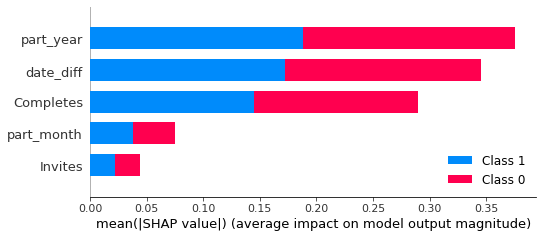

In [138]:
shap_values =  explainer.shap_values(testX)
shap.summary_plot(shap_values,testX, feature_names=['Invites','Completes','date_diff','part_year','part_month'])